In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
f=pd.read_csv('D:/bg/Diabetes_XTrain.csv')
a=np.array(f)

f.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [17]:
test=a[575::1]
print(test.shape)

a=a[:575]
print(a.shape)
print(a)

(1, 8)
(575, 8)
[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  7.    187.     68.    ...  37.7     0.254  41.   ]
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]]


In [18]:
plt.style.use('seaborn-pastel')

In [19]:
ff=pd.read_csv('D:/bg/Diabetes_YTrain.csv')

In [24]:
ff
a1=np.array(ff)


a1=a1[:575]
a1.reshape((-1,))
print(a1.shape)

(575, 1)


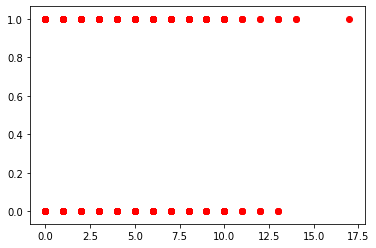

In [25]:
#plt.scatter(a[:,0],a[:,1],color='red')
plt.scatter(a[:,0],a1[:,0],color='red')
plt.show()

In [41]:
def dist(a,b):
    return np.linalg.norm(a-b)
    #return np.math.sqrt((sum(a-b)**2))
def knn(x,y,point,k=25):
    vals=[]
    m=x[0].shape
    #print(x[0])
    #print(m)
    #print(point)
    for i in range(k):

        d=dist(point,x[i])
        vals.append((d,y[i]))

    vals.sort()
    vals=vals[:k]
    o=0
    z=0
    for i in vals:
        if(i[1]==0):
            z+=1
        else:
            o+=1
    p=1
    if(z<o):
        p=0
    return p

In [42]:
p=knn(a,a1,test)
print(test)
print(p)

[[ 1.    88.    78.    29.    76.    32.     0.365 29.   ]]
1


In [43]:
testx=pd.read_csv('D:/bg/Diabetes_XTest.csv')
testx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [48]:
testy=pd.read_csv('D:/bg/Diabetes_Ytest.csv')
testy.head()

,Outcome
0,1
1,1
2,1
3,1
4,1


In [49]:
testx=np.array(testx)
testy=np.array(testy)
testx[0].shape
testy.reshape((-1,))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

(192, 8)


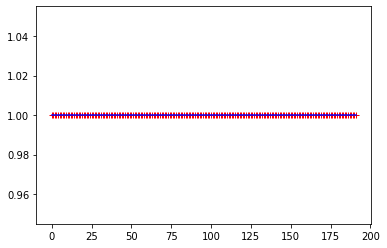

In [50]:
m=testx.shape
print(m)
hold=[]
predict=[]
for i in range(m[0]):
    predict.append(knn(a,a1,testx[i]))

index=[]
o=0
for i in testy:
    index.append(o)
    o+=1
    hold.append(i)

plt.plot(index,hold,'+',color='red')
plt.plot(index,predict,color='blue')
plt.show()